In [2]:
import nltk
from nltk import word_tokenize

In [2]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /Users/anseon-
[nltk_data]     yeong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/anseon-
[nltk_data]     yeong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#Q1
text = 'Family is not an important thing. It`s everything.'
word_tokens = word_tokenize(text)#text token

stopwords = nltk.corpus.stopwords.words('english')# road stopwords
cleaned_words = [w for w in word_tokens if w not in stopwords]

print(word_tokens)
print(cleaned_words)

['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', '`', 's', 'everything', '.']
['Family', 'important', 'thing', '.', 'It', '`', 'everything', '.']


In [4]:
#Q2
nltk.download('wordnet')
from nltk import PorterStemmer, WordNetLemmatizer
words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives',
        'fly', 'dies', 'watched', 'has', 'starting']
#어간추출
stemmer = PorterStemmer()
stems = [stemmer.stem(t) for t in words]

#표제어 추출
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(t) for t in words]

print(stems)
print(lemmas)

[nltk_data] Downloading package wordnet to /Users/anseon-
[nltk_data]     yeong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


In [5]:
#Q3
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

quote ="""If you wish to make an apple pie from scratch,
you must first invent the universe.
"""

#텍스트 토큰화
words_quote = word_tokenize(quote)

#품사 태깅
tags = nltk.pos_tag(words_quote)

print(words_quote)
print(tags)

['If', 'you', 'wish', 'to', 'make', 'an', 'apple', 'pie', 'from', 'scratch', ',', 'you', 'must', 'first', 'invent', 'the', 'universe', '.']
[('If', 'IN'), ('you', 'PRP'), ('wish', 'VBP'), ('to', 'TO'), ('make', 'VB'), ('an', 'DT'), ('apple', 'NN'), ('pie', 'NN'), ('from', 'IN'), ('scratch', 'NN'), (',', ','), ('you', 'PRP'), ('must', 'MD'), ('first', 'VB'), ('invent', 'VB'), ('the', 'DT'), ('universe', 'NN'), ('.', '.')]


[nltk_data] Downloading package punkt to /Users/anseon-
[nltk_data]     yeong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anseon-yeong/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['the', 'little', 'yellow', 'dog', 'barked', 'at', 'the', 'cat', '.']
[('the', 'DT'), ('little', 'JJ'), ('yellow', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('cat', 'NN'), ('.', '.')]
(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN)
  ./.)


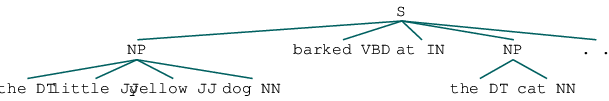

In [7]:

#Q4
from IPython.display import display
quote = "the little yellow dog barked at the cat."

#텍스트 토큰화
words_quote = nltk.word_tokenize(quote)
print(words_quote)

#품사 태깅하기
pos_tags = nltk.pos_tag(words_quote)
print(pos_tags)

#청크문법 정의하기
grammar = '\n'.join([
    'NP: {^<DT>*<JJ>*<NN>}',
    'NP: {<JJ>*}',
    'NP: {<DT>*<NN>}'
    
])

#청크 파서 생성하기
chunk_parser = nltk.RegexpParser(grammar)

sentences = nltk.sent_tokenize(quote)

#청크파싱
tree = chunk_parser.parse(pos_tags)

for sentence in sentences:
    print(tree)
    display(tree)#트리 시각화
            

In [ ]:
#!pip install spacy

['Deemed', 'universities', 'charge', 'huge', 'fees']
(charge (universities Deemed) (fees huge))


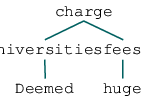

/opt/anaconda3/lib/python3.8/site-packages/spacy/displacy/__init__.py:97: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



In [ ]:
#Q5

import spacy
from spacy import displacy

sentence = "Deemed universities charge huge fees"
#텍스트 토큰화하기
tokens = nltk.word_tokenize(sentence)
print(tokens)

grammar = nltk.grammar.DependencyGrammar.fromstring("""

'universities' -> 'Deemed'
'charge' -> 'universities'
'fees' -> 'huge'
'charge' -> 'fees'

""")


#의존 파서 생성하기
dp = nltk.parse.ProjectiveDependencyParser(grammar)

#단어 파싱하기
ps = sorted(dp.parse(sentence.split()))

#의존 구문 분석 시각화
for parse in ps:
    print(parse)
    display(parse)
    
    
    #내장 pos태그 로드
tag = spacy.load("en_core_web_sm")
doc = tag(sentence)

#spacy 이용해서 의존파싱 시각화
displacy.serve(doc, style="dep")